# HackSciML 2023 - Cromatografía
https://sites.google.com/ing.puc.cl/hacksciml-rl4cenia

CENIA IMCUC iHealth

## Contexto

La cromatografía es una de las técnicas más poderosas, versátiles y modernas para la
separación y cuantificación de compuestos químicos o analitos. En un solo experimento, se
pueden separar y cuantificar diversos analitos de una mezcla compleja desde matrices líquidas
o gaseosas.

La técnica de separación cromatográfica se basa en la migración diferencial (diferente
velocidad de adsorción) de los componentes de una mezcla que son arrastrados a lo largo de
un medio poroso o fase estacionaria (un líquido o sólido) por un solvente en movimiento o
fase móvil (un gas, líquido, o fluido supercrítico). Los componentes que son adsorbidos más
débilmente por la fase estacionaria avanzan más rápido, mientras que los adsorbidos más
fuertemente se rezagan (**Fig. 1A**). Generalmente se opera por cargas o lotes, obteniéndose
un producto purificado pero diluido a diferentes tiempos de retención o salida de la columna
(**Fig. 1B**).

<img src="Fig1.png" width="1000">

**Figura 1.** Esquema ilustrativo de una separación cromatográfica. 

**(A)** Se carga una mezcla con tres analitos
representados por triángulos, cuadrados y círculos. Debido a la afinidad diferencial de los diferentes componentes,
cada uno de ellos migra a diferente velocidad a través de la columna. En este caso, los triángulos son los componentes
más afines a la fase estacionaria ya que van rezagados, mientras que los círculos son los componentes menos afines
y salen primero de la columna.

**(B)** Perfil cromatográfico o cromatograma con el perfil de concentraciones (o
volúmenes de elución) de la solución a la salida de la columna. Al final de la columna se encuentran detectores que
entregan una señal proporcional (no necesariamente lineal) a la concentración de los analitos que salen de la
columna, la cuál se asume afín. Es importante destacar que la señal de los detectores no es comparable entre analitos, es decir, no
necesariamente una mayor señal de un analito se corresponde con una mayor concentración al compararlo con otro
analito.

## Descripción matemática de la adsorción

El balance de masa no-estacionario de soluto en elemento de volumen A·Δz, asumiendo $u$
(velocidad superficial) y $D_L$ (dispersión axial) constantes en la columna, cuando Δz → 0 resulta
en la siguiente ecuación diferencial parcial para el proceso:

$$
    \frac{\partial C}{\partial t} + \frac{1-\varepsilon}{\varepsilon}\cdot\frac{\partial\bar{q}}{\partial t} + \frac{u}{\varepsilon}\frac{\partial C}{\partial z} = D_L \frac{\partial^2 C}{\partial z^2}
$$

donde:

* $\varepsilon$ = porosidad del lecho
* $\bar{q}$ = carga de soluto adsorbida
* $C$ = Concentración de soluto en el fluido
* $u$ = velocidad superficial del fluido
* $D_L$ = dispersión axial (aparente) del soluto en el lecho

**Relación de equilibrio entre la contentración de analito en la fase móvil y estacionaria**

$$
    \bar{q} = K\cdot C
$$

con $K$ constante de equilibrio o partición [volumen total/volumen adsorbente].

**Condición inicial:**

En t = 0 la concentración del analito en la columna es nula:
$$
    C(z, t=0) = 0, \hspace{0.4cm} 0 \leq z \leq L
$$

**Condición de borde:**

Danckwerts a la entrada y salida de la columna:
$$
    \left.C\right|_{z=0} = C_p + \varepsilon\frac{D_L}{u}\cdot \left.\frac{\partial C}{\partial z}\right|_{z=0}
$$
$$
    \left.\frac{\partial C}{\partial z}\right|_{z=L} = 0
$$

donde $C_p$ es la concentración del pulso de analito inyectada en la muestra, y $t_p$ es el tiempo del pulso de inyección. La primera concentración varía como sigue:

$$
    C_p = \left\{
        \begin{array}{lc}
            C_{in} & 0 \leq t \leq t_p \\ \\
            0 & t > t_p
        \end{array} \right.
$$

## Desafío 💡

La cuantificación mediante cromatografía se basa en la generación de curvas de calibrado
donde diferentes concentraciones de un analito (estándar) son inyectadas y sus
cromatogramas analizados. <u>El área bajo la curva del cromatograma resultante es proporcional
a la concentración del analito inyectado</u>. Si bien son varios los parámetros conocidos y
controlados durante un proceso cromatográfico (**Tabla 1**), otros parámetros como $\color{yellow}D_L$ y $\color{yellow}K$
dependen fuertemente de las condiciones de operación, interacción del analito con la columna,
y la naturaleza de la fase móvil utilizada. Por este motivo estos parámetros deben ser
estimados para cada ensayo.

A partir de esta información, se le pide que determine la concentración de analito inyectado
($\color{yellow}C_{in}$) en el cromatograma desafío (**Fig. 2**) generado bajo las condiciones de operación
indicadas en la **Tabla 1**. Como información previa, considere que la concentración del analito
inyectado en el cromatograma de entrenamiento (**Fig. 3**) es $\color{yellow}523.23 \left[mg/L\right]$ y que éste fue
generado bajo las condiciones de la **Tabla 1**.

| Parámetro                  | Valor |
|----------------------------|:-----:|
| $\varepsilon$ [-]          |  0.37 |
| $u$ [cm/min]               |  5.55 |
| $L$ (largo columna) [cm]   |  15   |
| $t_p$ [s]                  |  1.0  |

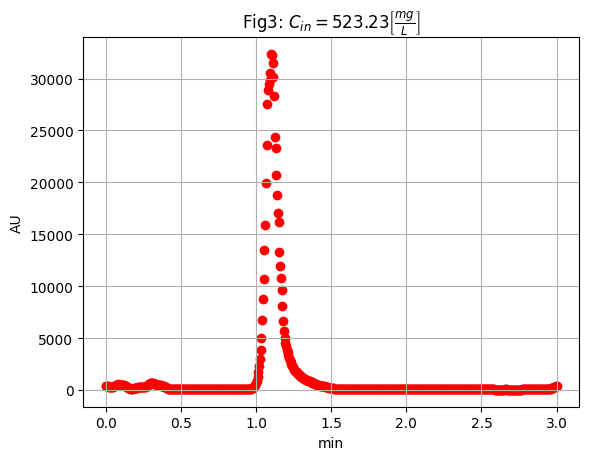

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df_Cin_conocido = pd.read_excel("datos_cromatografia.xlsx", 0)
Cobs_conocido = df_Cin_conocido['AU']
t_conocido = df_Cin_conocido['min']

plt.figure()
plt.scatter(t_conocido, Cobs_conocido, color='Red')
plt.title(r"Fig3: $C_{in} = 523.23 \left[\frac{mg}{L}\right]$")
plt.xlabel("min")
plt.ylabel("AU")
plt.grid()
plt.show()

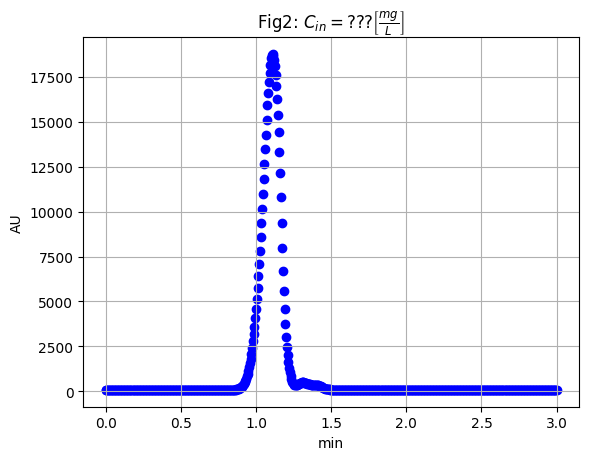

In [5]:
df_Cin_desconocido = pd.read_excel("datos_cromatografia.xlsx", 1)
Cobs_desconocido = df_Cin_desconocido['AU']
t_desconocido = df_Cin_desconocido['min']

plt.figure()
plt.scatter(t_desconocido, Cobs_desconocido, color='Blue')
plt.title(r"Fig2: $C_{in} = ??? \left[\frac{mg}{L}\right]$")
plt.xlabel("min")
plt.ylabel("AU")
plt.grid()
plt.show()